To speed the execution procces, Colaboraty has an option to use GPU. This option is selected by default.

# How to study the dogs and cats dataset

In this notebook, we illustrate how FrImCla can be employed to classify images. We have to train the framework to make these classifications. This is a simple example to show how to use FrImCla. We train the models with a dogs and cats dataset of only 600 images (300 images per class).

With this notebook we want to show and explain non-expert users the methods they have to use to run FrImCla. 

In [0]:
!wget "https://drive.google.com/uc?id=1nMhMINs75FEIW2bAgmSbW1OqUV1Cqs3b&export=download&authuser=0" -O DogCat.zip
!unzip DogCat.zip

--2019-04-09 08:54:22--  https://drive.google.com/uc?id=1nMhMINs75FEIW2bAgmSbW1OqUV1Cqs3b&export=download&authuser=0
Resolving drive.google.com (drive.google.com)... 74.125.195.101, 74.125.195.102, 74.125.195.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/uc?id=1nMhMINs75FEIW2bAgmSbW1OqUV1Cqs3b&export=download [following]
--2019-04-09 08:54:22--  https://drive.google.com/uc?id=1nMhMINs75FEIW2bAgmSbW1OqUV1Cqs3b&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ftbpt1j0a2kgt56incqn7jlrgvf0brtu/1554796800000/05147614325801676241/*/1nMhMINs75FEIW2bAgmSbW1OqUV1Cqs3b?e=download [following]
--2019-04-09 08:54:24--  https://doc-04-3s-docs.googleusercontent.com/docs/securesc

In case that FrImCla is not installed in your system, the first task consist in installing using pip.

In [0]:
!pip install frimcla

    100% |████████████████████████████████| 419kB 13.7MB/s 
    100% |████████████████████████████████| 1.5MB 19.1MB/s 
    100% |████████████████████████████████| 348kB 25.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/eb/16/4d/5bded41e2ca07dce0e11ef0fc31b14daf37d417c1c865e9cba
  Stored in directory: /root/.cache/pip/wheels/fb/2a/81/12bc1070527dc81ef856f9d36db9ec0a42e8c14985d005395b
  Stored in directory: /root/.cache/pip/wheels/8c/0e/36/56d4e5ddf02e0ddd1d8f9eb8d90975a5192e0155ffe28ff19c
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built frimcla mahotas commentjson wget
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


We need some libraries to execute this framework and obtain the results. 

In [0]:
from frimcla.index_features import generateFeatures
from frimcla.StatisticalComparison import statisticalComparison
from frimcla.train import train
from frimcla.prediction import prediction

Using TensorFlow backend.


### Configuring the variables of the program

First of all, we have to indicate the variables that the program need such as the path of the dataset, the models you want to use,...

In [0]:
datasetPath = "./DogCat"
outputPath = "./output"

####Advanced parameters

In [0]:
batchSize = 32 
verbose = False
# measure = "accuracy" #You can use accuracy, f1, auroc, precision or recall 
trainingSize = 1
nSteps=10

In [0]:
Measure = 'accuracy' #@param ["accuracy", "f1", "auroc", "precision", "recall"]

In the next section we have to select the feature extractors that we want to use (It is mandatory to **select at least one option**)

In [0]:
VGG16 = True #@param {type:"boolean"}
VGG19 = True #@param {type:"boolean"}
ResNet = True #@param {type:"boolean"}
Inception = True #@param {type:"boolean"}
GoogleNet = True #@param {type:"boolean"}
Overfeat = True #@param {type:"boolean"}
Xception = True #@param {type:"boolean"}
Densenet = True #@param {type:"boolean"}
LAB888 = True #@param {type:"boolean"}
LAB444 = True #@param {type:"boolean"}
HSV888 = True #@param {type:"boolean"}
HSV444 = True #@param {type:"boolean"}
Haralick = True #@param {type:"boolean"}
Hog = True #@param {type:"boolean"}
Haarhog = True #@param {type:"boolean"}

featureExtractors = []

if VGG19 :
  featureExtractors.append(["vgg19","False"])
if VGG16 :
  featureExtractors.append(["vgg16","False"])
if ResNet :
  featureExtractors.append(["resnet","False"])
if Inception :
  featureExtractors.append(["inception","False"])
if GoogleNet :
  featureExtractors.append(["googlenet"])
if Overfeat :
  featureExtractors.append(["overfeat","[-3]"])
if Xception :
  featureExtractors.append(["xception","False"])
if Densenet :
  featureExtractors.append(["densenet"])
if LAB888 :
  featureExtractors.append(["lab888"])
if LAB444 :
  featureExtractors.append(["lab444","4,4,4"])
if HSV888 :
  featureExtractors.append(["hsv888"])
if HSV444 :
  featureExtractors.append(["hsv444","4,4,4"])
if Haralick :
  featureExtractors.append(["haralick"])
if Hog :
  featureExtractors.append(["hog"])
if Haarhog :
  featureExtractors.append(["haarhog"])

Now we have to indicate the classifier models that we want to use (It is mandatory to **select at least one option**)

In [0]:
MLP = True #@param {type:"boolean"}
SVM = True #@param {type:"boolean"}
KNN = True #@param {type:"boolean"}
LogisticRegression = True #@param {type:"boolean"}
GradientBoost = True #@param {type:"boolean"}
RandomForest = True #@param {type:"boolean"}

modelClassifiers = []


if MLP :
  modelClassifiers.append("MLP")
if SVM :
  modelClassifiers.append("SVM")
if KNN :
  modelClassifiers.append("KNN")
if LogisticRegression :
  modelClassifiers.append("LogisticRegression")
if GradientBoost :
  modelClassifiers.append("GradientBoost")
if RandomForest :
  modelClassifiers.append("RandomForest")

### Generating the features

At this step we stored the features of each image of the dataset. These features depend on the model used at this moment because each model stores different features of the image. 

In [0]:
generateFeatures(outputPath, batchSize, datasetPath, featureExtractors, verbose)

[INFO] loading ['inception', 'False']...
Instructions for updating:
Colocations handled automatically by placer.
96116736/96112376 [==============================] - 3s 0us/step
[WARN] minimum init buffer not reached - 2019-04-09 09:02:58.304987
[INFO] creating datasets... - 2019-04-09 09:02:58.305250
[INFO] writing un-empty buffers... - 2019-04-09 09:02:58.306379
[INFO] writing `image_ids` buffer - 2019-04-09 09:02:58.307077
[INFO] writing `features` buffer - 2019-04-09 09:02:58.308632
[INFO] compacting datasets... - 2019-04-09 09:02:58.315537
[INFO] old size of `image_ids`: 600; new size: 600 - 2019-04-09 09:02:58.315707
[INFO] old size of `features`: 600; new size: 600 - 2019-04-09 09:02:58.315793


### Statistical analysis

Now with the features of all the images of each model we can perform a statistical analysis to know which of this models has the best performace.

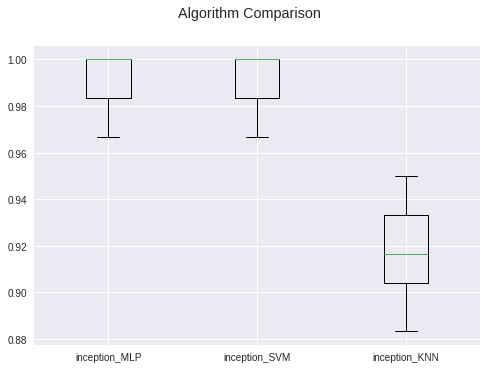

In [0]:
statisticalComparison(outputPath, datasetPath, featureExtractors, modelClassifiers, measure, nSteps, verbose)

### Train the model

The study gives us as result the best model and indicates if there are significant differences between this and the rest of the models. With this information, we can train the best model and return as a result of the framework to the user.

In [0]:
train(outputPath, datasetPath, trainingSize)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[INFO] best hyperparameters: {'activation': 'relu', 'alpha': 0, 'learning_rate': 'invscaling', 'momentum': 0.99, 'solver': 'lbfgs'}
[INFO] dumping classifier...
Do you want to generate a web app to classify the images with the best combination? y/n
y


### Predict the class of the images

Finally, we have the best model and we can use it to predict the class of our images. To do this we have to use the following command and we have to define the feature extractor and the classifier. The prediction will store in the predictionResults file.

In [0]:
image = "./DogCat/dog/488.jpg"
featExt = ["inception", "False"]
classi = "MLP"
prediction(featExt, classi, image, outputPath, datasetPath)

[INFO] loading model...
[INFO] loading ['inception', 'False']...
[INFO] class predicted for the image dog:488.jpg: ['dog']


In [0]:
!cat output/DogCat/predictionResults.csv

image_id, /DogCat
dog:488.jpg, 1
